In [1]:
import numpy as np
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt

## PLSA Condicional (ejemplo 15.7)

Tenemos que implementar el algoritmo PLSA para el modelo x <- z <- y. Se trata simplemente del algoritmo 15.3 pero, como en el caso del algoritmo 15.2, la vectorización y garantizar que se trabaja con distribuciones de probabilidad oscurecen en el código la idea básica. 

In [ ]:
def plsaCond(pxgy, Z, opts):
    """    
    Conditional PLSA Probabilistic Latent Semantic Analysis
    [tpxgz,tpygz,tpxgy]=plsa(pxgy,Z,opts)

    Entrada:
    pxgy : matriz con las frecuencias p(x|y)
    Z : dimensiones latentes/ocultas
    opts: diccionario con parámetros adicionales
    opts.maxit : número máximo de iteraciones
    opts.tol : tolerancia para convergir
    opts.randinit : vale 1 para una inicialización aleatoria -- en caso contrario, toma
     los valores de opts.tpxgz, opts.tpygz, opts.tpz

    Salida:
    tpxgz : aproximación de p(x|z)
    tpzgy : aproximación de p(z|y)
    tpxgy : aproximación de p(x|y)
    """

    # Cardinales de los conjuntos subyacentes.
    X = pxgy.shape[0]
    Y = pxgy.shape[1]

    # Inicialización.
    if opts["randinit"] == 1:
        rng = np.random.default_rng()
        tpxgz = rng.random((X,Z))
        tpxgz = tpxgz / tpxgz.sum(axis=0)
        tpzgy = rng.random((Z,Y))
        tpzgy = tpzgy / tpzgy.sum(axis=0)
    else:
        tpxgz = opts["tpxgz"]
        tpzgy = opts["tpzgy"]

    eps = 0.0000001  # para evitar divisiones entre cero
    L = np.zeros(opts["maxit"]) # para guardar la verosimilitud
    qzgxy = np.zeros((Z,X,Y))
    for emloop in range(opts["maxit"]):
        tpxgy = np.zeros((X,Y)) + eps
        
        # Paso E:
        
        for z in range(Z):
           ## qzgxy[z,:,:] = tpxgz[:,z].reshape(-1,1) * tpzgy[z,:]
           ## tpxgy+= qzgxy[z,:,:]
             tpxgy+= tpxgz[:,z].reshape(-1,1) * tpzgy[z,:]
           
    
       # qzgxy = qzgxy / np.sum(qzgxy,axis =0)
        
            
            
        L[emloop] = np.sum(pxgy * np.log(tpxgy+eps)) # log `likelihood'
        
        for z in range(Z):
            qzgxy[z,:,:] = (tpxgz[:,z].reshape(-1,1) * tpzgy[z,:]) / (tpxgy +eps)
           # qzgxy[z,:,:] = qzgxy[z,:,:] / np.sum(qzgxy,axis =0,keepdims=True) 

            

        
        for z in range(Z):
            tpxgz[:,z] = np.sum(pxgy * qzgxy[z,:,:], axis=1)
            
        
        for z in range(Z):
            tpzgy[:,:] = np.sum(pxgy * qzgxy[z,:,:], axis=0)
            
        

        # Normalizar
        tpxgz = tpxgz / np.sum(tpxgz, axis=0)
        tpzgy = tpzgy / np.sum(tpzgy, axis=0)

      
    return tpxgz, tpzgy, tpxgy

In [3]:
def plsaCond(pxgy, Z, opts):
    """    
    Conditional PLSA Probabilistic Latent Semantic Analysis
    [tpxgz,tpygz,tpxgy]=plsa(pxgy,Z,opts)

    Entrada:
    pxgy : matriz con las frecuencias p(x|y)
    Z : dimensiones latentes/ocultas
    opts: diccionario con parámetros adicionales
    opts.maxit : número máximo de iteraciones
    opts.tol : tolerancia para convergir
    opts.randinit : vale 1 para una inicialización aleatoria -- en caso contrario, toma
     los valores de opts.tpxgz, opts.tpygz, opts.tpz

    Salida:
    tpxgz : aproximación de p(x|z)
    tpzgy : aproximación de p(z|y)
    tpxgy : aproximación de p(x|y)
    """

    # Cardinales de los conjuntos subyacentes.
    X = pxgy.shape[0]
    Y = pxgy.shape[1]

    # Inicialización.
    if opts["randinit"] == 1:
        rng = np.random.default_rng()
        tpxgz = rng.random((X,Z))
        tpxgz = tpxgz / tpxgz.sum(axis=0)
        tpzgy = rng.random((Z,Y))
        tpzgy = tpzgy / tpzgy.sum(axis=0)
    else:
        tpxgz = opts["tpxgz"]
        tpzgy = opts["tpzgy"]

    eps = 0.0000001  # para evitar divisiones entre cero
    L = np.zeros(opts["maxit"]) # para guardar la verosimilitud
    qzgxy = np.zeros((Z,X,Y))
    for emloop in range(opts["maxit"]):
        tpxgy = np.zeros((X,Y)) + eps
        # Calcular tpxgy

        for z in range(Z):
            tpxgy += tpxgz[:,z].reshape(-1, 1) * tpzgy[z,:]
            
        L[emloop] = np.sum(pxgy * np.log(tpxgy+eps)) # log `likelihood'

    	# Paso E: Calcular q(z|x,y) = p(x|z) * p(z|y) / p(x|y)
        for z in range(Z):
            qzgxy[z, :, :] = (tpxgz[:, z].reshape(-1, 1) * tpzgy[z, :]) / (tpxgy + eps)
        
        # Paso M:

         ## Actualizar p(x|z)
        for z in range(Z):
            tpxgz[:, z] = np.sum(pxgy * qzgxy[z, :, :], axis=1)

        ## Actualizar p(z|y)
        for z in range(Z):
            tpzgy[z, :] = np.sum(pxgy * qzgxy[z, :, :], axis=0)

        # Normalizar
        tpxgz = tpxgz / np.sum(tpxgz, axis=0)
        tpzgy = tpzgy / np.sum(tpzgy, axis=0)

        if emloop > 1:
            if np.abs(L[emloop] - L[emloop-1]) < opts["tol"]:
                print(emloop)
                print(L)
                break        

    return tpxgz, tpzgy, tpxgy

Carga del conjunto de datos con las caras.

In [4]:
from sklearn.datasets import fetch_olivetti_faces

In [5]:
# Carga del conjunto de datos con las caras.
data = fetch_olivetti_faces()
images = data.images

Altenativamente, se puede utilizar el conjunto de datos en los que las fotografías no han sido recortadas (los resultados son mejores con menos iteraciones). Para ello se puede utilizar el código de la celda siguiente, cargando las caras de los ficheros disponibles en el campus. Además, es importante tener en cuenta que las dimensiones de estas imágenes son 112x92 en vez de 64x64.

In [6]:
"""
images = np.zeros((400,112,92))

for i in range(40):
    for j in range(10):
        file = f'ORL/s{i+1}/{j+1}.pgm'
        with open(file, 'r', encoding='latin-1') as infile:
            header = infile.readline()
            header = infile.readline()
            header = infile.readline()
            width, height, maxval = 92, 112, 255
            images[i*10+j] = np.fromfile(infile, dtype=np.uint8).reshape((height, width))

images.shape
"""

"\nimages = np.zeros((400,112,92))\n\nfor i in range(40):\n    for j in range(10):\n        file = f'ORL/s{i+1}/{j+1}.pgm'\n        with open(file, 'r', encoding='latin-1') as infile:\n            header = infile.readline()\n            header = infile.readline()\n            header = infile.readline()\n            width, height, maxval = 92, 112, 255\n            images[i*10+j] = np.fromfile(infile, dtype=np.uint8).reshape((height, width))\n\nimages.shape\n"

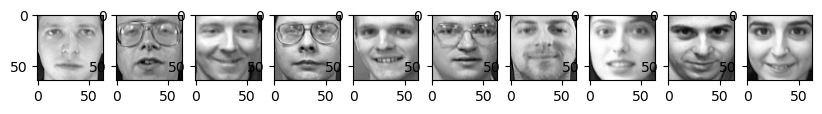

In [7]:
# Mostrar algunas de las caras.
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(1, 10, figsize=(10,2))
for i in range(10):
    axs[i].imshow(images[i*10], cmap='gray')       

Elegimos las caras que formarán la base.

In [6]:
basis = np.zeros((4,64,64))
basis[0] = images[0] / images[0].sum()
basis[1] = images[10] / images[10].sum()
basis[2] = images[60] / images[60].sum()
basis[3] = images[70] / images[70].sum()

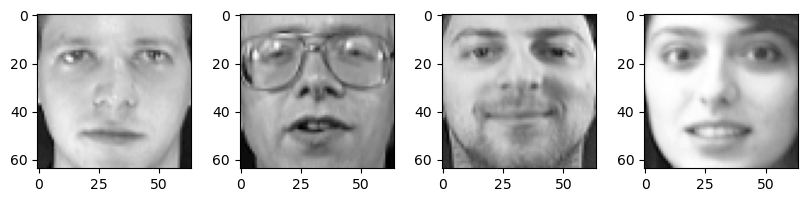

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(10,2))
for i in range(4):
    axs[i].imshow(basis[i], cmap='gray')

Creamos un conjunto de entrenamiento con 144 caras obtenidas mediante combinación convexa de las caras de la base.

In [8]:
train = np.zeros((144,64,64))

rng = np.random.default_rng()
for i in range(144):
    w = rng.random(4)
    w = w / w.sum() # garantizamos que sea distribución de probabilidad
    # train[i] = w[0]*basis[0] + w[1]*basis[1] + w[2]*basis[2] + w[3]*basis[3]
    train[i] = (w.reshape(4,1,1) * basis).sum(axis=0)

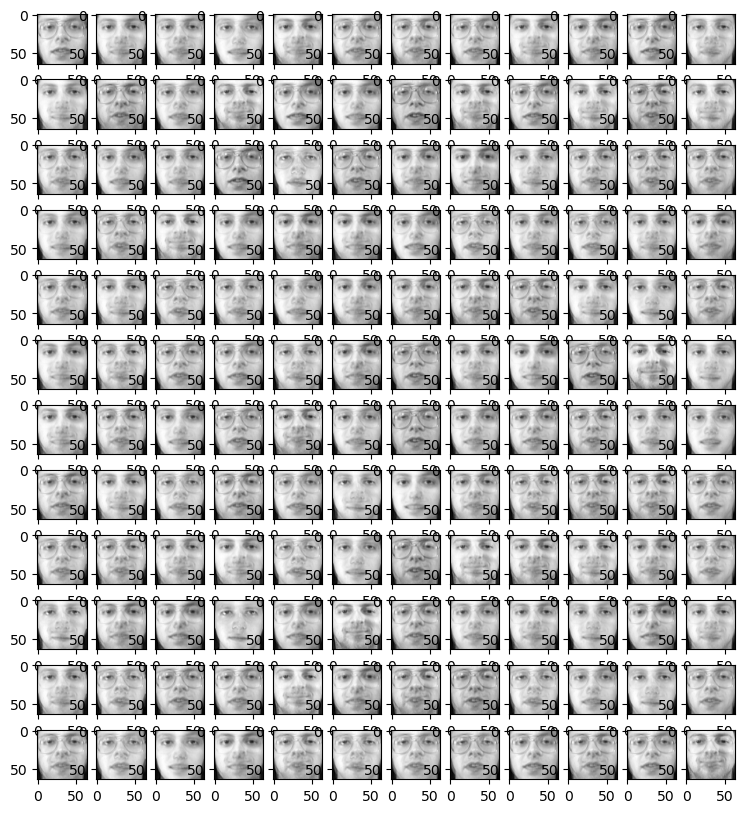

In [9]:
fig, axs = plt.subplots(12, 12, figsize=(9,10))
for i in range(12):
    for j in range(12):
        axs[i][j].imshow(train[i*12+j], cmap='gray')

Preparamos los datos de entrada para el algoritmo convirtiendo las matrices de las caras en vectores.

In [10]:
train_flat = train.reshape(144,4096)
pxgy = np.zeros((4096,144))
for i in range(144):
    pxgy[:,i] = train_flat[i]

In [11]:
opts = {
    "maxit": 10000,         
    "tol": 1e-5,          
    "randinit": 1,   
}

Queremos aplicar PLSA condicional para obtener las caras originales. En este contexto, recordando que estamos trabajando con un modelo x <- z <- y, ¿qué representan las siguientes variables y distribuciones? 
- x: los píxeles de una imagen.
- z: índices de las imágenes originales que se han utilizado para crear las nuevas imágenes
- y: índices de las imágenes generadas
- p(x|y): probabilidad de que los pixeles de una imagen se correspondan con el indice de una imagen generada
- p(x|z): probabilidad de que los pixeles de una imagen esten formados por la imagen orignial z
- p(z|y): probabiliad de observarar el indice de la cara original dado el indice de la imagen genrada y

In [12]:
tpxgz, tpzgy, tpxgy = plsaCond(pxgy,4,opts)

403
[-1206.96765865 -1195.89216235 -1195.45432611 ...     0.
     0.             0.        ]


In [13]:
# Recuperar la base
recovered_basis = np.zeros((4,64,64))
for z in range(4):  # Para cada una de las 4 bases latentes
    recovered_basis[z] = tpxgz[:, z].reshape(64, 64)


El resultado mejora con 5000 iteraciones.

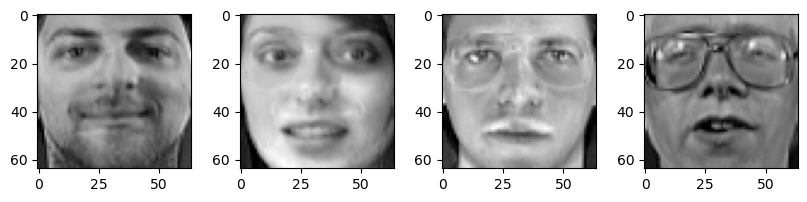

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(10,2))
for i in range(4):
    axs[i].imshow(recovered_basis[i], cmap='gray')

### Con SVD (PAC)

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)

trainD = pca.fit_transform(train_flat)
reducedX = trainD @ pca.components_ 

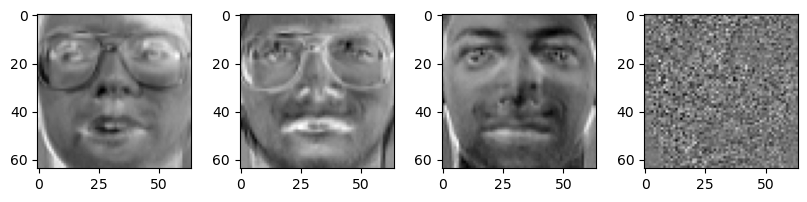

In [18]:
fig, axs = plt.subplots(1, 4, figsize=(10,2))
for i in range(4):
    axs[i].imshow(pca.components_[i].reshape(64,64)+train.mean(axis=0), cmap='gray')

# Ejercicio.
Vamos a comparar los resultados obtenidos con PLSA y PCA. Cuando acabes, comenta en la siguiente celda las diferencias que observas, a qué pueden deberse, ventajas y desventajas de cada método...

En el primer caso en el que tenemos 4 componentes principales para el caso de PCA y 4 temas latentes en PLSA, observamos que el PLSA captura mejor las relaciones puesto que tiene en cuenta las varibales latentes, en este caso, las imagenes reales con los que se han formado nuestros conjunto de datos. En el caso de PCA,como solo intenta maximizar la varianza explicada, observamos que al proyectar las componentes principales, estas son menos visuales, obteniendo hasta una componente (la 4) que no es una cara (Aún no siendo esta una cara aporta información al modelo puesta que el PCA combina linealmente estas cuatro componentes).
Por otra parte, en el caso de usar 48 componentes principales, ambos metodos obtienen resultados similares. En el caso de PCA, este captura casi la totalidad de relaciones de nuestros datos, por lo tanto aunque no tenga en cuenta los temas latentes, lo explica correctamente. Y en el caso de PLSA, al usar un numero tan alto de variables latentes, este es redundante, lo que significa que algunas bases latentes pueden ser muy similares o incluso idénticas en su capacidad para describir datos, lo que ocurre en nuestro caso.

### Comparación con PCA (ejemplo 15.2)

Creamos un conjunto de prueba de tamaño 100 escogiendo 3 caras de cada persona.

In [21]:
train_pca = np.zeros((100,64,64))
for i in range(33):
    train_pca[i*3] = images[i*10]
    train_pca[i*3+1] = images[i*10+1]
    train_pca[i*3+2] = images[i*10+2]
train_pca[99] = images[330]

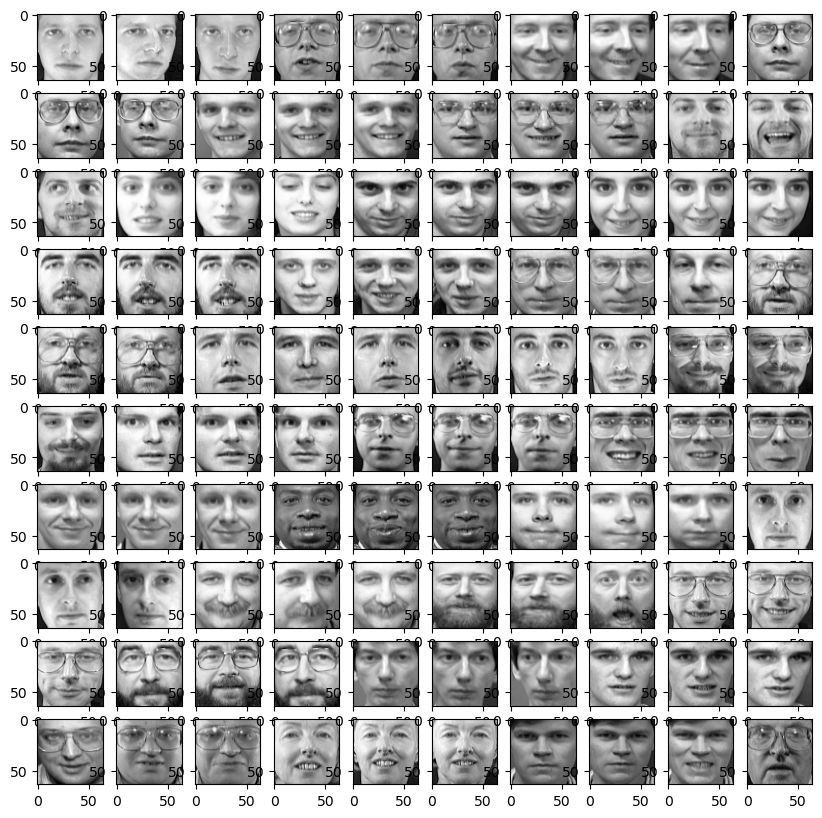

In [22]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(train_pca[i*10+j].reshape(64,64), cmap='gray')

In [23]:
pca = PCA(n_components = 48)
trainD = pca.fit_transform(train_pca.reshape(100,4096))
reducedX = trainD @ pca.components_ 

Dibujamos las "autocaras".

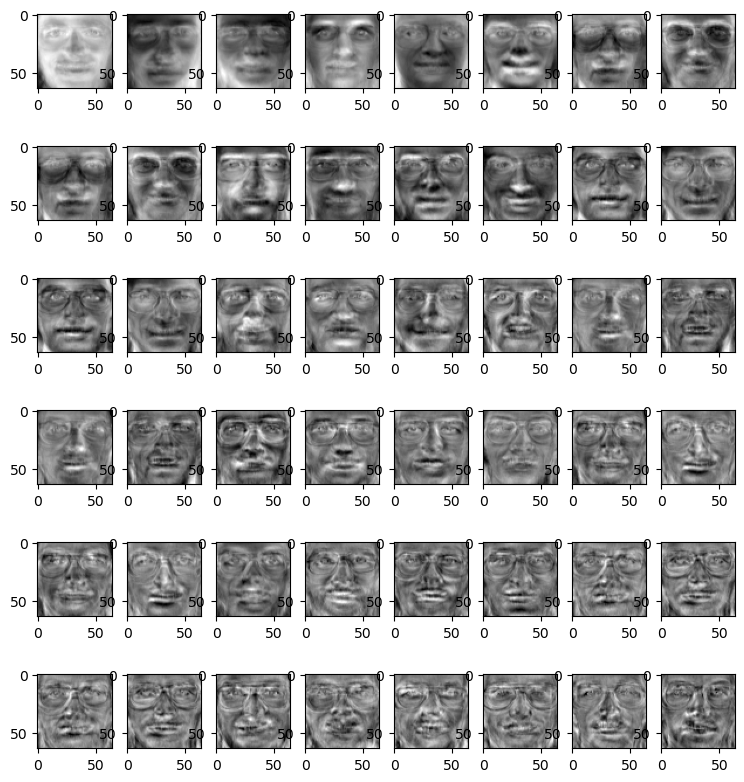

In [24]:
fig, axs = plt.subplots(6, 8, figsize=(9,10))
for i in range(6):
    for j in range(8):
        axs[i][j].imshow(pca.components_[i*6+j].reshape(64,64), cmap='gray')

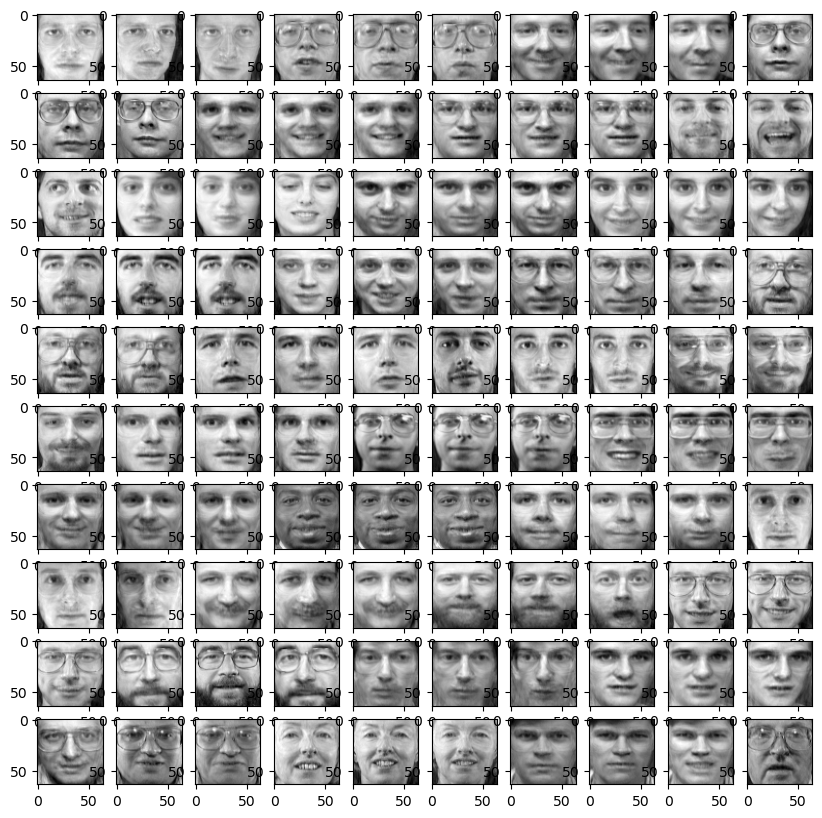

In [25]:
# Reconstrucción con la media y las 48 autocaras.

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(reducedX[i*10+j].reshape(64,64)+train_pca.mean(axis=0), cmap='gray')

Calculamos los 48 elementos de la base con PLSA.

In [26]:
opts = {"tol" : 0.0000001,
        "maxit" : 2000,
        "randinit" : 1
       }

Se puede experimentar con el número de iteraciones. (Los resultados mostrados requirieron 10 minutos en ordenador de hace 8 años para 2000 iteraciones.)

In [27]:
train_flat = train_pca.reshape(100,4096)
pxgy = np.zeros((4096,100))
for i in range(100):
    pxgy[:,i] = train_flat[i]

In [28]:
tpxgz, tpzgy, tpxgy = plsaCond(pxgy,48,opts)

Dibujamos las "autocaras" obtenidas con PLSA.

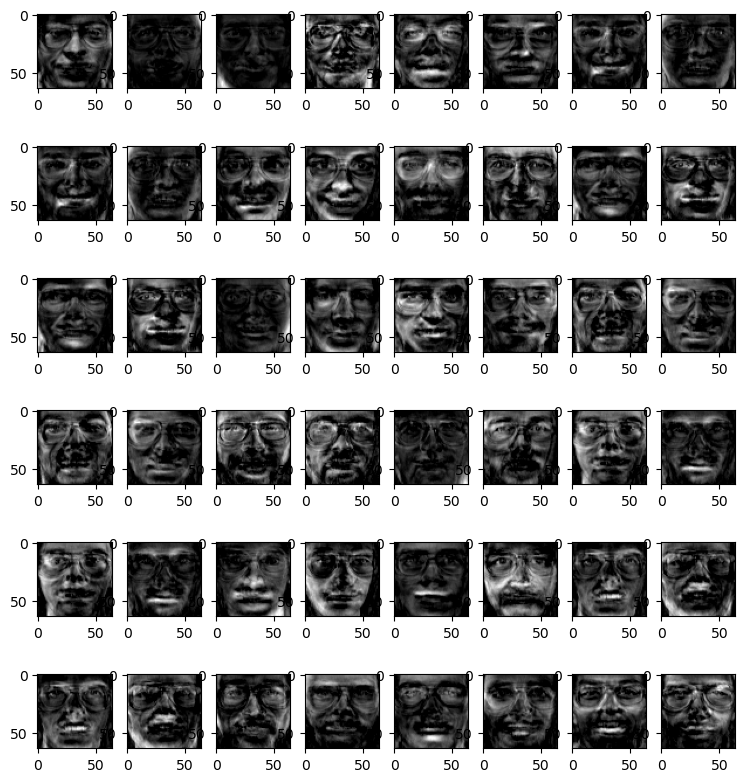

In [29]:
fig, axs = plt.subplots(6, 8, figsize=(9,10))
for i in range(6):
    for j in range(8):
        axs[i][j].imshow(tpxgz[:,i*6+j].reshape(64,64), cmap='gray')

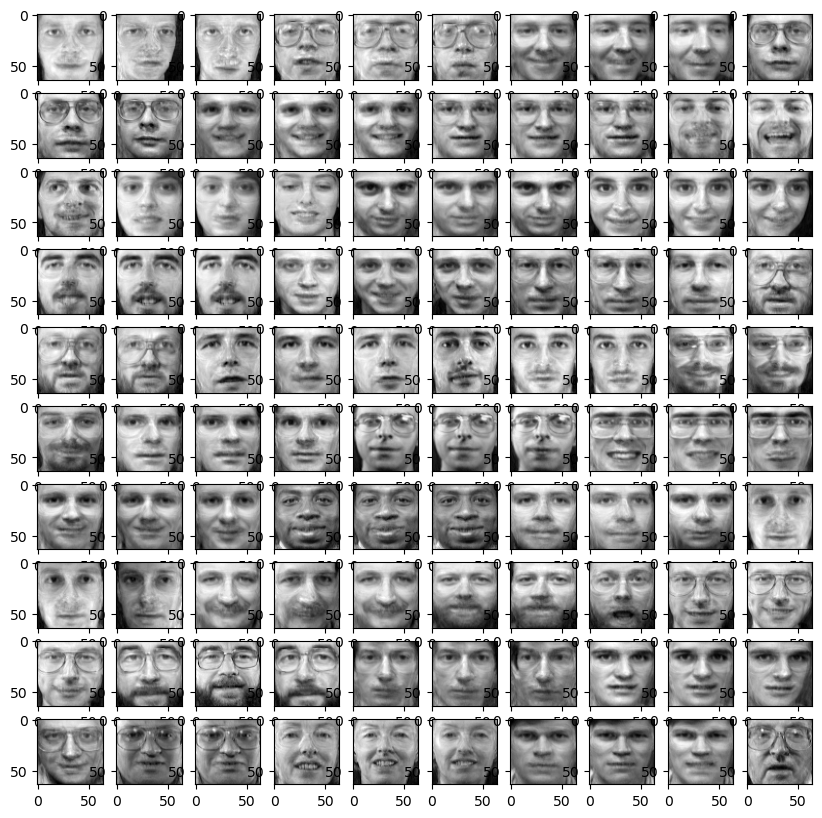

In [30]:
# Reconstrucción con las 48 autocaras de PLSA.

fig, axs = plt.subplots(10, 10, figsize=(10,10))
for i in range(10):
    for j in range(10):
        axs[i][j].imshow(tpxgy[:,i*10+j].reshape(64,64), cmap='gray')